In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SEM V/PBL/communities-crime-clean.csv')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib


Using matplotlib backend: agg


In [ ]:
def setHighCrime(df):
    '''Function to set value of highCrime depending on ViolentCrimesPerPop'''
    if df['ViolentCrimesPerPop'] > 0.1:
        return True
    else:
        return False


df['highCrime'] = df.apply(setHighCrime, axis=1)

percentage_intances = df.groupby('highCrime').size() * 100 / len(df)
print(percentage_intances)
print("------------------")
print("Percentage Positive Instance = {}\nPercentage Negative Instance = {} ".format(percentage_intances[1],percentage_intances[0]))


highCrime
False    37.280482
True     62.719518
dtype: float64
------------------
Percentage Positive Instance = 62.719518314099346
Percentage Negative Instance = 37.280481685900654 


In [ ]:
df.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,highCrime
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,...,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06,False
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,...,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14,True
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,...,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,1.00,True
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,...,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,0.23,True
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,...,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,0.15,True


In [ ]:
df.dtypes

state                    int64
communityname           object
fold                     int64
population             float64
householdsize          float64
                        ...   
PopDens                float64
PctUsePubTrans         float64
LemasPctOfficDrugUn    float64
ViolentCrimesPerPop    float64
highCrime                 bool
Length: 105, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Columns: 105 entries, state to highCrime
dtypes: bool(1), float64(101), int64(2), object(1)
memory usage: 1.6+ MB


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


In [ ]:
corr_matrix = df.corr()

In [ ]:
corr_matrix['highCrime'].sort_values(ascending = False)

highCrime              1.000000
ViolentCrimesPerPop    0.609898
FemalePctDiv           0.558881
TotalPctDiv            0.546691
MalePctDivorce         0.510418
                         ...   
PctTeen2Par           -0.504932
PctYoungKids2Par      -0.514521
pctWInvInc            -0.540066
PctFam2Par            -0.564554
PctKids2Par           -0.590535
Name: highCrime, Length: 104, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.metrics as metrics


In [ ]:
X = df.drop('ViolentCrimesPerPop', axis=1).drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1).drop('highCrime', axis=1)
features = list(X.columns)
y = df["highCrime"]



dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)
predicted = dt_clf.predict(X[features])
recall_score = metrics.recall_score(df['highCrime'], predicted)
precision_score = metrics.precision_score(df['highCrime'], predicted)
accuracy_score = metrics.accuracy_score(df['highCrime'], predicted)
print("Training Accuracy = {} Precision = {} Recall = {}".format(accuracy_score,precision_score,recall_score))

Training Accuracy = 1.0 Precision = 1.0 Recall = 1.0


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score


In [ ]:
for depth in range(1,10):
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    if tree_clf.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_clf, X, y,scoring='accuracy', cv=10, n_jobs=1))
    print("Depth: %i Accuracy: %.3f" % (depth,score))

Depth: 1 Accuracy: 0.761
Depth: 2 Accuracy: 0.776
Depth: 3 Accuracy: 0.798
Depth: 4 Accuracy: 0.790
Depth: 5 Accuracy: 0.779
Depth: 6 Accuracy: 0.768
Depth: 7 Accuracy: 0.764
Depth: 8 Accuracy: 0.746
Depth: 9 Accuracy: 0.744


In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X,y)
 
pred_dt= dt_clf.predict(X)
dt_accuracy= metrics.accuracy_score(df['highCrime'], pred_dt)
dt_precision= metrics.precision_score(df['highCrime'], pred_dt)
dt_recall= metrics.recall_score(df['highCrime'], pred_dt)
print("Accuracy for DT =",dt_accuracy)
print("Precision for DT =",dt_precision)
print("Recall for DT =",dt_precision)

Accuracy for DT = 0.8359257400903161
Precision for DT = 0.9002601908065915
Recall for DT = 0.9002601908065915


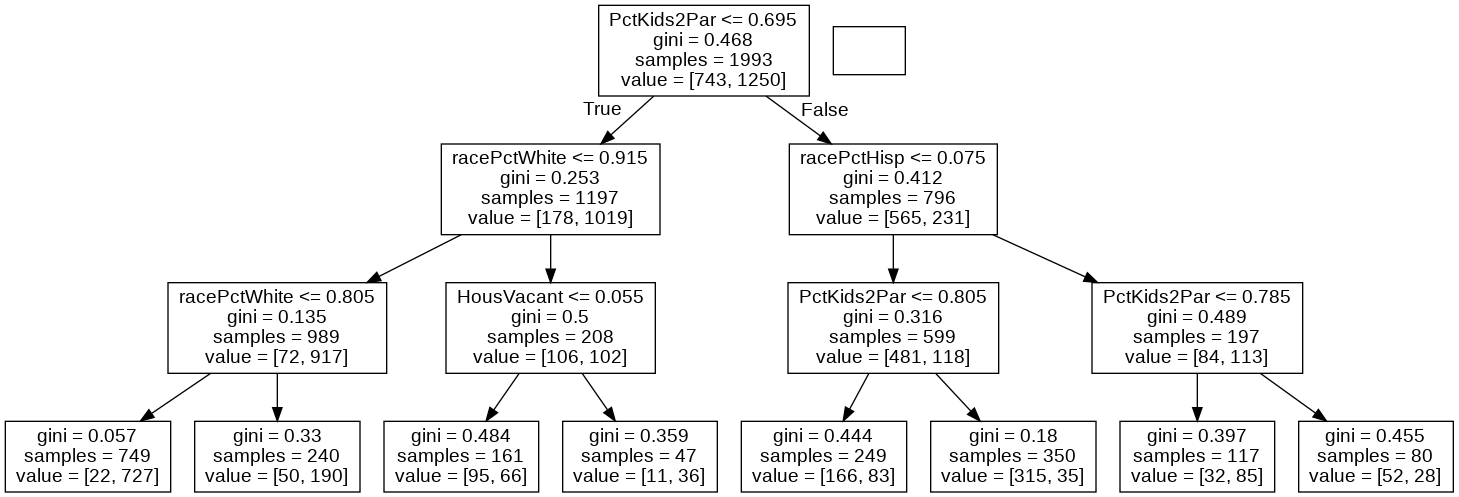

In [ ]:
from sklearn import tree
import pydotplus 
from IPython.display import Image 

dot_data = tree.export_graphviz(dt_clf, out_file=None,feature_names=list(X))

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
dt_cv_accuracy = cross_val_score(dt_clf, X, y, cv=10).mean()
dt_cv_precision= cross_val_score(dt_clf, X, y, cv=10, scoring='precision').mean()
dt_cv_recall = cross_val_score(dt_clf, X, y, cv=10, scoring='recall').mean()
print("Cross Validation Accuracy DT:", dt_cv_accuracy)
print("Cross Validation Recall DT:", dt_cv_precision)
print("Cross Validation Precision DT:", dt_cv_recall)


Cross Validation Accuracy DT: 0.7982437185929648
Cross Validation Recall DT: 0.8432674799594686
Cross Validation Precision DT: 0.8392


In [ ]:
# Using GaussianNB
gaussian_clf = GaussianNB()
gaussian_clf.fit(X, y)

# Applying 10 fold cross validation
gaussian_accuracy = cross_val_score(gaussian_clf, X, y, cv=10).mean()
gaussian_precision= cross_val_score(gaussian_clf, X, y, cv=10, scoring='precision').mean()
gaussian_recall = cross_val_score(gaussian_clf, X, y, cv=10, scoring='recall').mean()
print("Accuracy for gaussian :", gaussian_accuracy)
print("Recall for gaussian:", gaussian_recall)
print("Precision for gaussian:", gaussian_precision)

Accuracy for gaussian : 0.761608040201005
Recall for gaussian: 0.692
Precision for gaussian: 0.9117998148278733


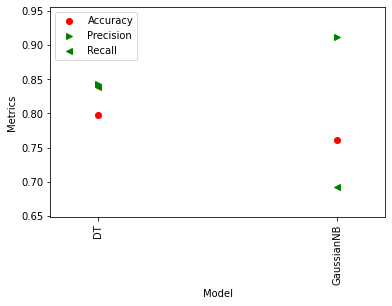

In [ ]:
labels = ["DT" ,"GaussianNB"]
acc_list = [dt_cv_accuracy,gaussian_accuracy]
pre_list = [dt_cv_precision,gaussian_precision]
re_list = [dt_cv_recall,gaussian_recall]

x_axis_range = range(2)
plt.xticks(x_axis_range, labels, rotation='vertical')
# plt.legend()

plt.plot(x_axis_range,acc_list,'ro',color="Red",label="Accuracy")
plt.plot(x_axis_range,pre_list,'>',color="green",label="Precision")
plt.plot(x_axis_range,re_list,'<',color="green",label="Recall")

plt.xlabel('Model')
plt.ylabel('Metrics')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
legend = plt.legend()
plt.show()

In [ ]:
from sklearn import svm


In [ ]:
linearsvmclf = svm.SVC(kernel='linear', C =1.0)
accuracy_svm = cross_val_score(linearsvmclf, X, y, cv=10, scoring='accuracy').mean()
precision_svm = cross_val_score(linearsvmclf, X, y, cv=10, scoring='precision').mean()
recall_svm = cross_val_score(linearsvmclf, X, y, cv=10, scoring='recall').mean()
print ('Accuracy for LinearSVC is', accuracy_svm)
print ('Precision for LinearSVC is', precision_svm)
print ('Recall for LinearSVC is', recall_svm)

Accuracy for LinearSVC is 0.8047537688442212
Precision for LinearSVC is 0.8551793727894672
Recall for LinearSVC is 0.8375999999999999


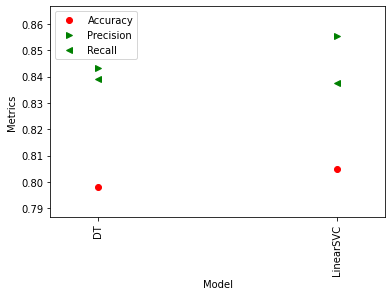

In [ ]:
labels = ["DT" ,"LinearSVC"]
acc_list = [dt_cv_accuracy,accuracy_svm]
pre_list = [dt_cv_precision,precision_svm]
re_list = [dt_cv_recall,recall_svm]

x_axis_range = range(2)
plt.xticks(x_axis_range, labels, rotation='vertical')
# plt.legend()

plt.plot(x_axis_range,acc_list,'ro',color="Red",label="Accuracy")
plt.plot(x_axis_range,pre_list,'>',color="green",label="Precision")
plt.plot(x_axis_range,re_list,'<',color="green",label="Recall")

plt.xlabel('Model')
plt.ylabel('Metrics')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
legend = plt.legend()
plt.show()